In [8]:
import os, sys, random, copy, json
import numpy as np
import cv2
import imutils
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Dense, Conv2D, Dropout, 
                                     Flatten, MaxPooling2D)
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
sys.path.append('../')

In [4]:
from utils.misc import contrivedLabel, plotLabel, summaryStats, bagData

In [5]:
from models.model import ModelBuilder

In [6]:
from utils.utils import makeMini, myPlot, answerToPoints, meanTruth, newVals, iterMean
from scorer_scripts_v2.scorer_scripts_v2.score_detections import score
from starter_scripts_v2.starter_scripts_v2.helper import plot_bbox

### Read-in Data

In [9]:
p_truth = '../truth_new.json'
with open(p_truth, 'r') as f:
    truth = json.load(f)

In [12]:
list(truth.items())[:3]

[('IMG_9622.JPG', [[583, 439, 772, 431, 779, 628, 582, 631]]),
 ('IMG_9925.JPG', [[481, 295, 769, 268, 777, 590, 480, 589]]),
 ('IMG_6733.JPG', [[593, 362, 650, 399, 649, 597, 589, 592]])]

In [17]:
truth_0 = {}
for k in truth.keys():
    if len(truth[k][0]) > 0:
        truth_0[k] = truth[k][0][0]

truth_1 = {}
for k in truth.keys():
    if len(truth[k][0]) > 0:
        truth_1[k] = truth[k][0][1]
        
print (list(truth_0.items())[:3], '\n', list(truth_1.items())[:3])

[('IMG_9622.JPG', 583), ('IMG_9925.JPG', 481), ('IMG_6733.JPG', 593)] 
 [('IMG_9622.JPG', 439), ('IMG_9925.JPG', 295), ('IMG_6733.JPG', 362)]


In [18]:
p_training = '../Data_Training/Data_Training/'
def loadImg(fn):
    return cv2.imread(p_training + fn)

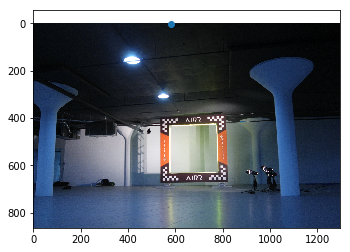

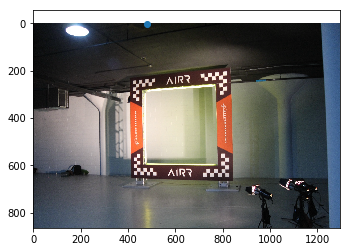

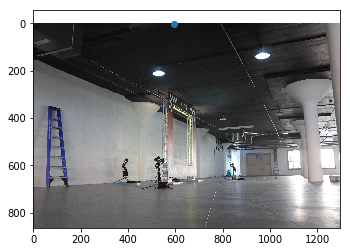

In [21]:
for _item in list(truth_0.items())[:3]:
    k,v = _item[0], _item[1]
    img = loadImg(k)
    plotLabel(img, x = v)

### Consider Resizing Options

In [109]:
fn  = list(truth.keys())[0]
img = loadImg(fn)
print(fn, img.shape)

IMG_9622.JPG (864, 1296, 3)


In [120]:
# these can all divide the width of the image modulo0
IMG_WIDTH = 1296
IMG_HEIGHT = 864
def printOneLine(input_list):
    print(" ".join([str(x) for x in input_list]) )
    
mod_width = list(filter(lambda i: IMG_WIDTH % i == 0,  range(1,1000)))
mod_height = list(filter(lambda i: IMG_HEIGHT % i == 0,  range(1,1000)))

printOneLine(mod_width)
printOneLine(mod_height)

mod_both = [elem for elem in mod_height if elem in mod_width]

printOneLine(mod_both)

1 2 3 4 6 8 9 12 16 18 24 27 36 48 54 72 81 108 144 162 216 324 432 648
1 2 3 4 6 8 9 12 16 18 24 27 32 36 48 54 72 96 108 144 216 288 432 864
1 2 3 4 6 8 9 12 16 18 24 27 36 48 54 72 108 144 216 432


(72, 108, 3)


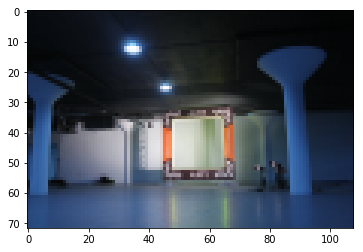

In [123]:
img_t = imutils.resize(img, width=108)
print(img_t.shape)
plt.imshow(img_t)

### Build Batch of images for a training run

In [74]:
random.seed = 0
N = 500
batch = random.sample(list(truth_0.keys()), N)

In [75]:
print(batch)

['IMG_8707.JPG', 'IMG_1370.JPG', 'IMG_8584.JPG', 'IMG_3357.JPG', 'IMG_1227.JPG', 'IMG_8292.JPG', 'IMG_4684.JPG', 'IMG_3980.JPG', 'IMG_3710.JPG', 'IMG_7613 (1).JPG', 'IMG_8402 (1).JPG', 'IMG_2902.JPG', 'IMG_0537.JPG', 'IMG_8679.JPG', 'IMG_8496 (1).JPG', 'IMG_6772.JPG', 'IMG_6677.JPG', 'IMG_2987.JPG', 'IMG_6627.JPG', 'IMG_7880 (1).JPG', 'IMG_2358.JPG', 'IMG_2581.JPG', 'IMG_7852 (1).JPG', 'IMG_0961.JPG', 'IMG_5598.JPG', 'IMG_3949.JPG', 'IMG_7864.JPG', 'IMG_8315 (1).JPG', 'IMG_3807.JPG', 'IMG_6737.JPG', 'IMG_9798.JPG', 'IMG_8597 (1).JPG', 'IMG_8676.JPG', 'IMG_6862 (1).JPG', 'IMG_1496.JPG', 'IMG_0328.JPG', 'IMG_1480.JPG', 'IMG_1472.JPG', 'IMG_2371.JPG', 'IMG_6808.JPG', 'IMG_4313.JPG', 'IMG_9764.JPG', 'IMG_2517.JPG', 'IMG_3847.JPG', 'IMG_1504.JPG', 'IMG_9816.JPG', 'IMG_8504.JPG', 'IMG_7703.JPG', 'IMG_3261.JPG', 'IMG_0721.JPG', 'IMG_5932.JPG', 'IMG_2515.JPG', 'IMG_3666.JPG', 'IMG_4420.JPG', 'IMG_1178.JPG', 'IMG_6958 (1).JPG', 'IMG_8790.JPG', 'IMG_4200.JPG', 'IMG_0631.JPG', 'IMG_0678.JPG', 'IM

In [134]:
q= [1,2,3]

In [135]:
w = q.copy()

In [137]:
isinstance(q, list)

True

In [ ]:
x_

In [76]:
x_load = [loadImg(k) for k in batch]

y0_load = [truth_0[k] for k in batch]
y1_load = [truth_0[k] for k in batch]

def resize(img):
    return imutils.resize(img, width=108)

x_resize = [resize(img) for img in x_load]

In [80]:
input_shape = x_resize[0].shape
input_shape

(72, 108, 3)

### Build Model Class

In [81]:
mb = ModelBuilder()

In [82]:
mb.setInputShape(input_shape)

In [83]:
mb.buildModel()

In [84]:
x_resize_np = np.array(x_resize)
x_resize_np.shape

(500, 72, 108, 3)

In [85]:
x_resize_np_norm = mb.normData(x_resize_np)

In [86]:
y0_np = np.array(y0_load)
y0_np.shape

(500,)

In [87]:
mb.fitModel(x=x_resize_np_norm,y=y0_np, epochs=100, validation_split=0.2)

Train on 400 samples, validate on 100 samples
Epoch 1/100
400/400 [==============================] - 3s 8ms/sample - loss: 56252891.7878 - mean_absolute_error: 2549.9600 - mean_squared_error: 56252880.0000 - val_loss: 40146.0353 - val_mean_absolute_error: 168.8887 - val_mean_squared_error: 40146.0352
Epoch 2/100
400/400 [==============================] - 3s 8ms/sample - loss: 35339.3862 - mean_absolute_error: 150.1433 - mean_squared_error: 35339.3867 - val_loss: 28769.9358 - val_mean_absolute_error: 138.2548 - val_mean_squared_error: 28769.9355
Epoch 3/100
400/400 [==============================] - 3s 8ms/sample - loss: 26071.3172 - mean_absolute_error: 128.7695 - mean_squared_error: 26071.3184 - val_loss: 14244.8817 - val_mean_absolute_error: 89.9305 - val_mean_squared_error: 14244.8809
Epoch 4/100
400/400 [==============================] - 3s 8ms/sample - loss: 62369.4722 - mean_absolute_error: 197.8895 - mean_squared_error: 62369.4688 - val_loss: 15319.0814 - val_mean_absolute_error

Epoch 34/100
400/400 [==============================] - 3s 8ms/sample - loss: 11050.4255 - mean_absolute_error: 84.0628 - mean_squared_error: 11050.4248 - val_loss: 17402.9836 - val_mean_absolute_error: 108.4517 - val_mean_squared_error: 17402.9824
Epoch 35/100
400/400 [==============================] - 3s 8ms/sample - loss: 11710.6538 - mean_absolute_error: 86.9456 - mean_squared_error: 11710.6533 - val_loss: 13341.0645 - val_mean_absolute_error: 93.7606 - val_mean_squared_error: 13341.0654
Epoch 36/100
400/400 [==============================] - 3s 9ms/sample - loss: 12505.3109 - mean_absolute_error: 89.5819 - mean_squared_error: 12505.3096 - val_loss: 9299.2898 - val_mean_absolute_error: 67.3949 - val_mean_squared_error: 9299.2900
Epoch 37/100
400/400 [==============================] - 3s 9ms/sample - loss: 10529.4200 - mean_absolute_error: 82.5476 - mean_squared_error: 10529.4199 - val_loss: 8786.3460 - val_mean_absolute_error: 66.4518 - val_mean_squared_error: 8786.3467
Epoch 38/10

400/400 [==============================] - 3s 8ms/sample - loss: 12959.2876 - mean_absolute_error: 90.7456 - mean_squared_error: 12959.2891 - val_loss: 9440.4442 - val_mean_absolute_error: 69.1166 - val_mean_squared_error: 9440.4434


### Evaluate

In [88]:
summaryStats(y0_np)

mean y      : 547.27
mean abs err: 78.3
mean sq err:  10533.96


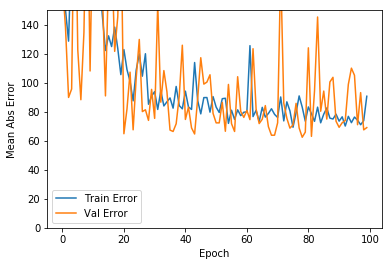

In [93]:
history = mb.history.copy()
mb.plotHistory(list(history.values())[0], y_high=150)

In [95]:
my_model = list(mb.models.copy().values())[0]

In [125]:
my_model.evaluate(x_resize_np_norm, y0_np)

500/500 [==============================] - 1s 3ms/sample - loss: 3026.5109 - mean_absolute_error: 37.4243 - mean_squared_error: 3026.5110


[3026.51091796875, 37.42433, 3026.511]

In [132]:
print(my_model.loss)
[_metric.name for _metric in my_model.metrics]

mean_squared_error


['mean_absolute_error', 'mean_squared_error']

In [124]:
# on training
mb.eval(my_model, x_resize_np_norm, y0_np, )

[3026.51091796875, 37.42433, 3026.511]

why is evaluate() saying ame=37 while the epoch printouts in stdout/history graph show are showing ame=60-90?

### Analyze Perf

In [143]:
truth = y0_np
predictions = my_model.predict(x=x_resize_np_norm)

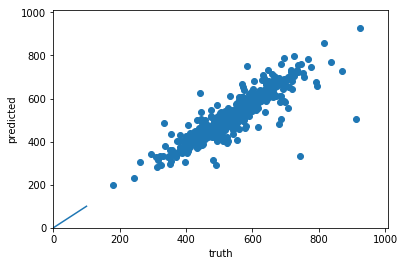

In [146]:
mb.plotPredVsActual(truth, predictions )

In [ ]:
# print out plotLable() of img that are close for predictedVsActual and those that are far:
# is there any defining feature? 
# plotLabel(actual_X, predicted_X)
# get a random image within a certain x-value-interval

### Save Model

In [168]:
from tensorflow.python.saved_model import tag_constants

with tf.Graph().as_default():
    with tf.Session as sess:
        ...

        # Saving
        inputs = {
            "batch_size_placeholder": batch_size_placeholder,
            "features_placeholder": features_placeholder,
            "labels_placeholder": labels_placeholder,
        }
        outputs = {"prediction": model_output}
        tf.saved_model.simple_save(
            sess, 'path/to/your/location/', inputs, outputs
        )

AttributeError: __enter__

In [170]:
my_model.save('../models/model_data/model_y0.h5')

In [171]:
models = mb_y1.models.copy()

In [176]:
model_y1 = models['0']

In [177]:
model_y1.save('../models/model_data/model_y1.h5')

In [180]:
#output batch
p_batch = '../models/model_data/batch_y0y1.txt'
s_batch = '\n'.join(batch)
with open(p_batch, 'w') as f:
    f.write(s_batch)

### Build Model for y1

In [162]:
mb_y1 = ModelBuilder()

In [163]:
mb_y1.setInputShape(input_shape)

In [164]:
y1_load = [truth_1[k] for k in batch]

In [165]:
y1_np = np.array(y1_load)
y1_np.shape

(500,)

In [166]:
mb_y1.buildModel()

In [167]:
mb_y1.fitModel(x=x_resize_np_norm, y=y1_np,  epochs=100, validation_split=0.2)

Train on 400 samples, validate on 100 samples
Epoch 1/100
400/400 [==============================] - 4s 9ms/sample - loss: 63940070.1412 - mean_absolute_error: 2584.3933 - mean_squared_error: 63940072.0000 - val_loss: 121435.4781 - val_mean_absolute_error: 338.3068 - val_mean_squared_error: 121435.4766
Epoch 2/100
400/400 [==============================] - 4s 9ms/sample - loss: 138140.9278 - mean_absolute_error: 329.0635 - mean_squared_error: 138140.9219 - val_loss: 55206.8512 - val_mean_absolute_error: 212.0258 - val_mean_squared_error: 55206.8516
Epoch 3/100
400/400 [==============================] - 4s 9ms/sample - loss: 38512.3661 - mean_absolute_error: 163.7761 - mean_squared_error: 38512.3672 - val_loss: 22287.1896 - val_mean_absolute_error: 119.4629 - val_mean_squared_error: 22287.1895
Epoch 4/100
400/400 [==============================] - 3s 8ms/sample - loss: 28550.1519 - mean_absolute_error: 139.0540 - mean_squared_error: 28550.1523 - val_loss: 27658.8786 - val_mean_absolute_

Epoch 34/100
400/400 [==============================] - 4s 9ms/sample - loss: 7289.9610 - mean_absolute_error: 65.3801 - mean_squared_error: 7289.9604 - val_loss: 5640.0577 - val_mean_absolute_error: 58.9245 - val_mean_squared_error: 5640.0576
Epoch 35/100
400/400 [==============================] - 4s 9ms/sample - loss: 9408.4223 - mean_absolute_error: 79.3859 - mean_squared_error: 9408.4229 - val_loss: 3875.2473 - val_mean_absolute_error: 44.3226 - val_mean_squared_error: 3875.2471
Epoch 36/100
400/400 [==============================] - 4s 9ms/sample - loss: 6656.5702 - mean_absolute_error: 63.4977 - mean_squared_error: 6656.5698 - val_loss: 19791.0789 - val_mean_absolute_error: 129.5521 - val_mean_squared_error: 19791.0801
Epoch 37/100
400/400 [==============================] - 4s 10ms/sample - loss: 6318.1440 - mean_absolute_error: 63.6825 - mean_squared_error: 6318.1445 - val_loss: 4424.5177 - val_mean_absolute_error: 46.0280 - val_mean_squared_error: 4424.5176
Epoch 38/100
400/400

400/400 [==============================] - 4s 10ms/sample - loss: 4593.8043 - mean_absolute_error: 53.6667 - mean_squared_error: 4593.8042 - val_loss: 4596.3119 - val_mean_absolute_error: 47.7772 - val_mean_squared_error: 4596.3120


### Misc